In [72]:
import pyodbc
import pandas as pd
import numpy as np

In [73]:
conn = pyodbc.connect('Driver={SQL SERVER};' 'Server=DESKTOP-UPD29KH\SQLEXPRESS;'
                     'Database=CropDataWarehouse;' 'Trust_Connection=yes')

In [74]:
if conn:
    print('True')

True


In [75]:
query_Rice = '''select * from FinalRice'''
query_Wheat = '''select * from FinalWheat'''
query_Fertilizer = '''select * from finalFertilizer'''
query_Temprature = '''select * from finalTemperature'''
query_Rainfall = '''select * from annualRainfall ORDER BY year ASC;'''

In [76]:
df_Rice = pd.read_sql(query_Rice, conn)
df_Wheat = pd.read_sql(query_Wheat, conn)
df_Fertilizer = pd.read_sql(query_Fertilizer, conn)
df_Temperature = pd.read_sql(query_Temprature, conn)
df_Rainfall = pd.read_sql(query_Rainfall, conn)


# # Save DataFrame to CSV file
# df_Rice.to_csv('data_from_sql.csv', index=False)

# Display the first few rows of the DataFrame


C:\Users\Dell-Inspiron\AppData\Local\Temp\ipykernel_12648\3609987005.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Rice = pd.read_sql(query_Rice, conn)
C:\Users\Dell-Inspiron\AppData\Local\Temp\ipykernel_12648\3609987005.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Wheat = pd.read_sql(query_Wheat, conn)
C:\Users\Dell-Inspiron\AppData\Local\Temp\ipykernel_12648\3609987005.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Fertilizer = pd.read_sql(query_Fertilizer, conn)
C:\Users\Dell-Inspiron\AppData\L

In [77]:
 df_Rice = df_Rice.rename(columns={'Value': 'Rice_Yield'})

In [78]:
df_Rice.head()

,Year,Item,Rice_Yield
0,1961,Rice,15419.0
1,1962,Rice,13959.0
2,1963,Rice,15498.0
3,1964,Rice,16171.0
4,1965,Rice,12936.0


In [79]:
df_Rice = df_Rice.iloc[:-7]

In [80]:
df_Rice.shape

(55, 3)

In [81]:
df_Rice.isnull().any()

Year          False
Item          False
Rice_Yield    False
dtype: bool

In [82]:
df_Wheat.tail()

,Year,Item,Value
57,2018,Wheat,33682.0
58,2019,Wheat,35334.0
59,2020,Wheat,34398.0
60,2021,Wheat,35208.0
61,2022,Wheat,35373.0


In [83]:
 df_Wheat = df_Wheat.rename(columns={'Value': 'Wheat_Yield'})

In [84]:
df_Wheat.head()

,Year,Item,Wheat_Yield
0,1961,Wheat,8507.0
1,1962,Wheat,8896.0
2,1963,Wheat,7929.0
3,1964,Wheat,7299.0
4,1965,Wheat,9132.0


In [85]:
df_Wheat = df_Wheat.iloc[:-7]

In [86]:
df_Wheat.shape

(55, 3)

In [87]:
df_Wheat.isnull().any()

Year           False
Item           False
Wheat_Yield    False
dtype: bool

In [88]:
df_Fertilizer.head()

,DomainCode,Domain,AreaCode,Area,ElementCode,Element,ItemCode,Item,YearCode,Year,Unit,Value,Flag,FlagDescription,Note
0,"""RFN",Fertilizers by Nutrient,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1961,1961,kg/ha,1.55,E,Estimated value,""""
1,"""RFN",Fertilizers by Nutrient,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1962,1962,kg/ha,2.05,E,Estimated value,""""
2,"""RFN",Fertilizers by Nutrient,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1963,1963,kg/ha,2.33,E,Estimated value,""""
3,"""RFN",Fertilizers by Nutrient,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1964,1964,kg/ha,3.42,E,Estimated value,""""
4,"""RFN",Fertilizers by Nutrient,356,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1965,1965,kg/ha,3.54,E,Estimated value,""""


In [89]:
df_Fertilizer['Item'].unique()

array(['Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
       'Nutrient potash K2O (total)'], dtype=object)

In [90]:
new_fert = df_Fertilizer.groupby('Year')['Value'].sum().reset_index()
new_fert.head()

,Year,Value
0,1961,2.10
1,1962,2.78
2,1963,3.36
3,1964,4.77
4,1965,4.84


In [91]:
 new_fert = new_fert.rename(columns={'Value': 'Fertilizer_usage'})

In [92]:
new_fert.head()

,Year,Fertilizer_usage
0,1961,2.10
1,1962,2.78
2,1963,3.36
3,1964,4.77
4,1965,4.84


In [93]:
new_fert.isnull().any()

Year                False
Fertilizer_usage    False
dtype: bool

In [94]:
new_fert = new_fert.iloc[:-6]


In [95]:
new_fert

,Year,Fertilizer_usage
0,1961,2.10
1,1962,2.78
2,1963,3.36
3,1964,4.77
4,1965,4.84
5,1966,6.76
6,1967,9.40
7,1968,10.69
8,1969,12.05
9,1970,13.67


In [96]:
new_fert.shape

(55, 2)

In [97]:
df_Temperature.head()

,Year,Annual
0,1960,29.31
1,1961,28.72
2,1962,28.89
3,1963,29.04
4,1964,29.09


In [98]:
df_Temperature =  df_Temperature.rename(columns={'Annual': 'Annual_Temperature'})

In [99]:
df_Temperature = df_Temperature[df_Temperature['Year'] != 1960]

In [100]:
df_Temperature.head()

,Year,Annual_Temperature
1,1961,28.72
2,1962,28.89
3,1963,29.04
4,1964,29.09
5,1965,29.16


In [101]:
df_Temperature.tail()

,Year,Annual_Temperature
53,2013,29.81
54,2014,29.72
55,2015,29.90
56,2016,31.63
57,2017,31.42


In [102]:
df_Temperature = df_Temperature.iloc[:-2]

In [103]:
df_Temperature

,Year,Annual_Temperature
1,1961,28.72
2,1962,28.89
3,1963,29.04
4,1964,29.09
5,1965,29.16
6,1966,29.41
7,1967,29.14
8,1968,29.07
9,1969,29.61
10,1970,29.47


In [104]:
df_Temperature = df_Temperature.reset_index(drop=True)

In [105]:
df_Temperature

,Year,Annual_Temperature
0,1961,28.72
1,1962,28.89
2,1963,29.04
3,1964,29.09
4,1965,29.16
5,1966,29.41
6,1967,29.14
7,1968,29.07
8,1969,29.61
9,1970,29.47


In [107]:
df_Temperature.shape

(55, 2)

In [108]:
df_Temperature.isnull().any()

Year                  False
Annual_Temperature    False
dtype: bool

In [110]:
df_Rainfall.tail()

,Year,total_annual_rainfall
110,2011,50146.4
111,2012,43524.5
112,2013,53106.2
113,2014,44796.1
114,2015,46101.0


In [111]:
df_Rainfall =  df_Rainfall.rename(columns={'total_annual_rainfall': 'Annual_Rainfall'})

In [112]:
df_Rainfall.head()

,Year,Annual_Rainfall
0,1901,44947.5
1,1902,46805.6
2,1903,47596.9
3,1904,43287.0
4,1905,41516.2


In [113]:
df_Rainfall = df_Rainfall[df_Rainfall['Year'] > 1960]

In [114]:
df_Rainfall

,Year,Annual_Rainfall
60,1961,61815.6
61,1962,48428.7
62,1963,53152.4
63,1964,53791.2
64,1965,42796.2
65,1966,46223.1
66,1967,49215.7
67,1968,46980.1
68,1969,49414.7
69,1970,55112.2


In [115]:
df_Rainfall.isnull().any()

Year               False
Annual_Rainfall    False
dtype: bool

In [116]:
df_Rainfall = df_Rainfall.reset_index(drop=True)

In [117]:
df_Rainfall

,Year,Annual_Rainfall
0,1961,61815.6
1,1962,48428.7
2,1963,53152.4
3,1964,53791.2
4,1965,42796.2
5,1966,46223.1
6,1967,49215.7
7,1968,46980.1
8,1969,49414.7
9,1970,55112.2


In [118]:
df_Rainfall.shape

(55, 2)

In [119]:

merged_df = df_Rice[['Year','Rice_Yield']].copy()
merged_df = pd.merge(merged_df, new_fert[['Fertilizer_usage']], left_index=True, right_index=True)  # Assuming you want to merge 'Column3'
merged_df = pd.merge(merged_df, df_Temperature[['Annual_Temperature']], left_index=True, right_index=True)  # Assuming you want to merge 'Column4' and 'Column5'

merged_df = pd.merge(merged_df, df_Rainfall[['Annual_Rainfall']], left_index=True, right_index=True)  # Assuming you want to merge 'Column4' and 'Column5'

In [120]:
merged_df

,Year,Rice_Yield,Fertilizer_usage,Annual_Temperature,Annual_Rainfall
0,1961,15419.0,2.10,28.72,61815.6
1,1962,13959.0,2.78,28.89,48428.7
2,1963,15498.0,3.36,29.04,53152.4
3,1964,16171.0,4.77,29.09,53791.2
4,1965,12936.0,4.84,29.16,42796.2
5,1966,12952.0,6.76,29.41,46223.1
6,1967,15484.0,9.40,29.14,49215.7
7,1968,16134.0,10.69,29.07,46980.1
8,1969,16094.0,12.05,29.61,49414.7
9,1970,16849.0,13.67,29.47,55112.2


C:\Users\Dell-Inspiron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


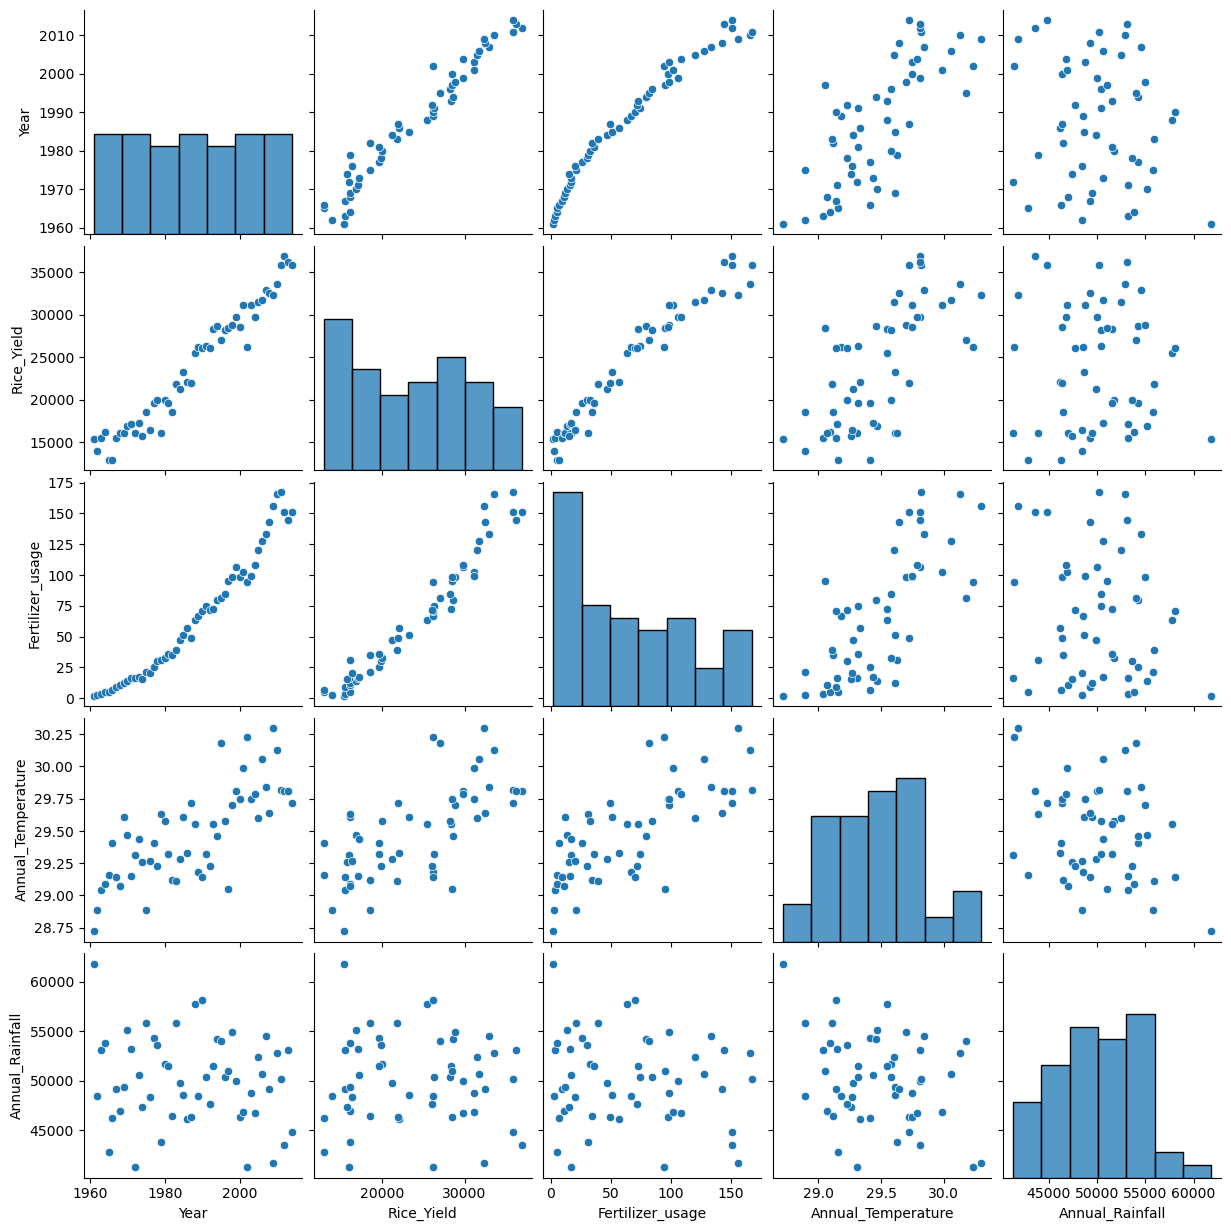

In [160]:
import seaborn as sns
ax = sns.pairplot(merged_df)
ax

In [161]:
data = merged_df.drop(['Year'], axis = 1)
data.corr()

,Rice_Yield,Fertilizer_usage,Annual_Temperature,Annual_Rainfall
Rice_Yield,1.000000,0.973391,0.681938,-0.022282
Fertilizer_usage,0.973391,1.000000,0.735152,-0.123932
Annual_Temperature,0.681938,0.735152,1.000000,-0.302747
Annual_Rainfall,-0.022282,-0.123932,-0.302747,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

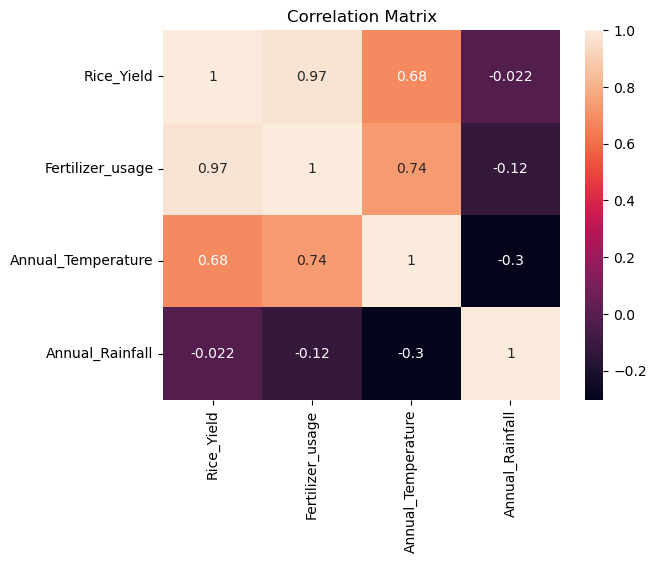

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

In [121]:
next_year_df = merged_df.tail(1).copy()
merged_df.drop(merged_df.tail(1).index, inplace=True)

In [122]:

next_year_df = next_year_df.reset_index(drop=True)
next_year_df

,Year,Rice_Yield,Fertilizer_usage,Annual_Temperature,Annual_Rainfall
0,2015,36002.0,157.91,29.9,46101.0


In [123]:
## MOdel

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
X = merged_df[['Year', 'Annual_Rainfall', 'Fertilizer_usage', 'Annual_Temperature']]
y = merged_df['Rice_Yield']

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Train the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [127]:
# Predict the yield for the next year
# Assuming you have the data for the next year stored in a DataFrame named df_next_year
X_next_year = next_year_df[['Year', 'Annual_Rainfall', 'Fertilizer_usage', 'Annual_Temperature']]
y_pred = model.predict(X_next_year)

In [128]:

# Evaluate the model
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

In [129]:
print(f"Predicted yield for the next year: {y_pred}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) score: {r2}")

Predicted yield for the next year: [35868.]
Root Mean Squared Error (RMSE): 1260.531201157238
R-squared (R2) score: 0.9756149178159859


In [131]:

# Calculate the range of the target variable (yield)
yield_range = y_test.max() - y_test.min() 
# Compare the RMSE to the range of the target variable
print(f"RMSE: {rmse}")
print(f"Range of yield values: {yield_range}")

RMSE: 1260.531201157238
Range of yield values: 23291.0


#### Since the RMSE is less than 10% of the range of yield values, it suggests that the model's predictions are relatively accurate. However, it's important to consider the specific requirements and goals of your project to determine if this level of accuracy is sufficient.

In [147]:
merged_df_wheat = df_Wheat[['Year','Wheat_Yield']].copy()
merged_df_wheat = pd.merge(merged_df_wheat, new_fert[['Fertilizer_usage']], left_index=True, right_index=True)  # Assuming you want to merge 'Column3'
merged_df_wheat = pd.merge(merged_df_wheat, df_Temperature[['Annual_Temperature']], left_index=True, right_index=True)  # Assuming you want to merge 'Column4' and 'Column5'

merged_df_wheat = pd.merge(merged_df_wheat, df_Rainfall[['Annual_Rainfall']], left_index=True, right_index=True)  # Assuming you want to merge 'Column4' and 'Column5'

C:\Users\Dell-Inspiron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


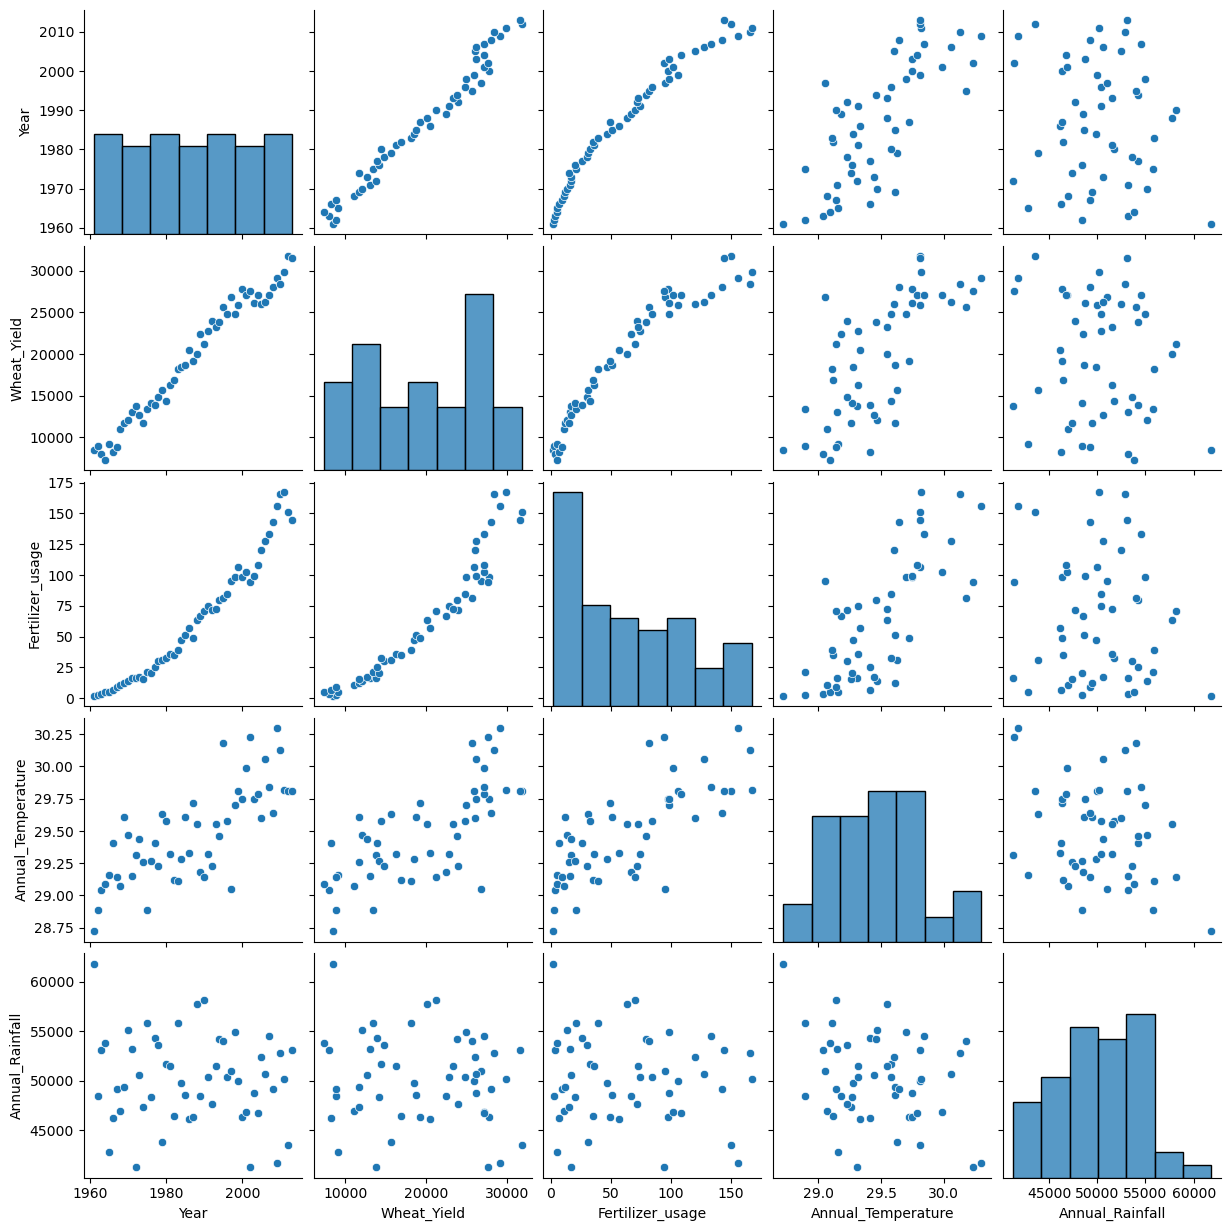

In [165]:
import seaborn as sns
ax = sns.pairplot(merged_df_wheat)
ax

In [166]:
data = merged_df.drop(['Year'], axis = 1)
data.corr()

,Rice_Yield,Fertilizer_usage,Annual_Temperature,Annual_Rainfall
Rice_Yield,1.000000,0.973391,0.681938,-0.022282
Fertilizer_usage,0.973391,1.000000,0.735152,-0.123932
Annual_Temperature,0.681938,0.735152,1.000000,-0.302747
Annual_Rainfall,-0.022282,-0.123932,-0.302747,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

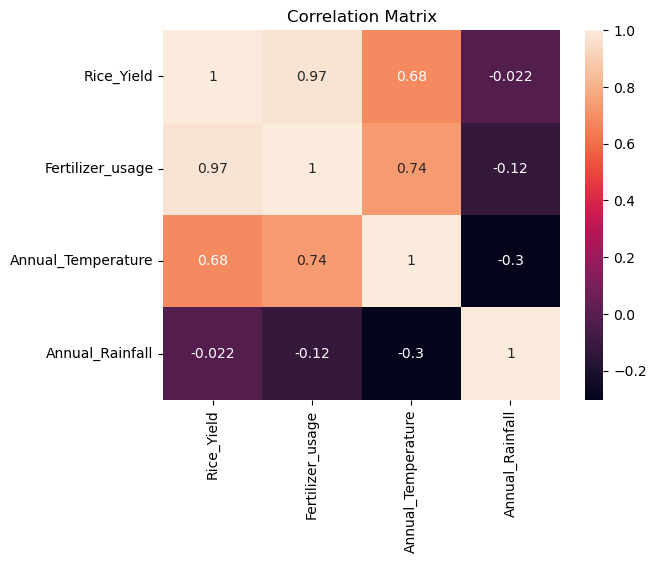

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

In [148]:
X = merged_df_wheat[['Year', 'Annual_Rainfall', 'Fertilizer_usage', 'Annual_Temperature']]
y = merged_df_wheat['Wheat_Yield']

In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
# Train the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [151]:
merged_df_wheat.tail()

,Year,Wheat_Yield,Fertilizer_usage,Annual_Temperature,Annual_Rainfall
50,2011,29886.0,167.52,29.82,50146.4
51,2012,31775.0,150.80,29.81,43524.5
52,2013,31538.0,144.49,29.81,53106.2
53,2014,31457.0,150.96,29.72,44796.1
54,2015,27496.0,157.91,29.90,46101.0


In [154]:
next_year_df_wheat = merged_df_wheat.tail(1).copy()
merged_df_wheat.drop(merged_df_wheat.tail(1).index, inplace=True)

next_year_df_wheat = next_year_df.reset_index(drop=True)
next_year_df_wheat

,Year,Wheat_Yield,Fertilizer_usage,Annual_Temperature,Annual_Rainfall
0,2015,27496.0,157.91,29.9,46101.0


In [155]:
merged_df_wheat.shape

(53, 5)

In [156]:
# Predict the yield for the next year
# Assuming you have the data for the next year stored in a DataFrame named df_next_year
X_next_year = next_year_df_wheat[['Year', 'Annual_Rainfall', 'Fertilizer_usage', 'Annual_Temperature']]
y_pred = model.predict(X_next_year)

In [157]:
# Evaluate the model
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

In [158]:
print(f"Predicted yield for the next year: {y_pred}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) score: {r2}")

Predicted yield for the next year: [27496.]
Root Mean Squared Error (RMSE): 1202.8951817102843
R-squared (R2) score: 0.9745219447343405


In [159]:
# Calculate the range of the target variable (yield)
yield_range = y_test.max() - y_test.min() 
# Compare the RMSE to the range of the target variable
print(f"RMSE: {rmse}")
print(f"Range of yield values: {yield_range}")

RMSE: 1202.8951817102843
Range of yield values: 23270.0


In [ ]:

data = crop_data.drop(['State_Name'], axis = 1)
data.corr()